In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

[0, 6, 0, 6]

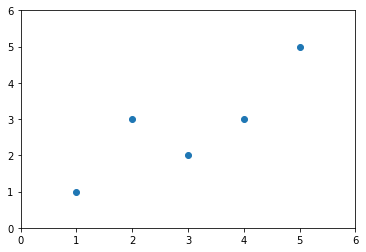

In [3]:
plt.scatter(x, y)
plt.axis([0,6,0,6])

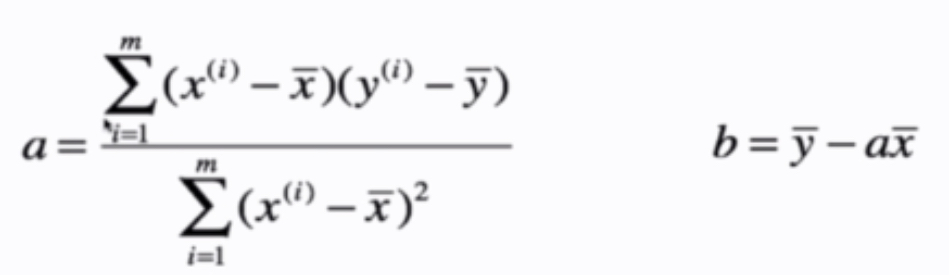

In [4]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [5]:
reg1 = SimpleLinearRegression()
reg1.fit(x, y)

SimpleLinearRegression()

In [6]:
y_hat = reg1.predict(np.array(x))

In [7]:
reg1.a_

0.8

In [8]:
reg1.b_

0.39999999999999947

[0, 6, 0, 6]

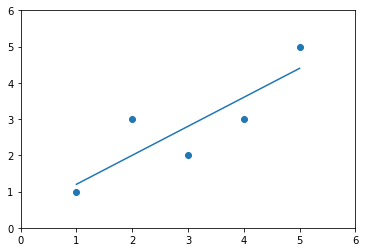

In [9]:
plt.scatter(x, y)
plt.plot(x, reg1.predict(np.array(x)))
plt.axis([0,6,0,6])

### 衡量回归算法的标准

In [3]:
from sklearn import datasets

### 波士顿房价数据

In [4]:
boston = datasets.load_boston()

In [12]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [13]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [14]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
x = boston.data[:,5] # 只取房间数量这个特征

In [16]:
x.shape

(506,)

In [17]:
y = boston.target

In [18]:
y.shape

(506,)

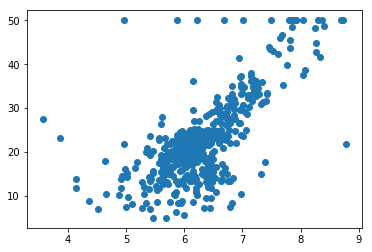

In [19]:
plt.scatter(x, y)    #上限值=》计量的仪器有一个上限值，问卷形式max
#这些点没有意义 删去

In [20]:
np.max(y)

50.0

In [21]:
x = x[y<50.0]
y = y[y<50.0]

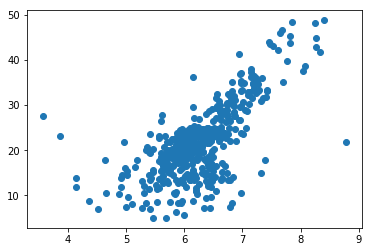

In [22]:
plt.scatter(x, y) 

In [23]:
from playML.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [24]:
x_train.shape

(392,)

In [25]:
x_test.shape

(98,)

In [26]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [27]:
y_hat = reg.predict(x_test)

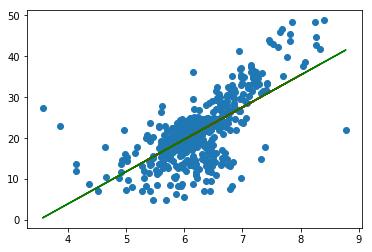

In [28]:
plt.scatter(x, y)
plt.plot(x_test, y_hat, color = "r")
plt.plot(x_train,reg.predict(x_train) , color = "g")

In [29]:
mse_test = np.sum((y_hat -y_test)**2)/len(y_test)

In [30]:
mse_test

24.156602134387438

In [31]:
from math import sqrt
RMSE = sqrt(mse_test)
RMSE

4.914936635846635

In [32]:
mae = np.sum(np.absolute(y_hat - y_test)/len(y_test))

In [36]:
mae
print(x_train.shape)
y_train.shape

(392,)


(392,)

In [1]:
from playML.LinearRegression import LinearRegression
from playML.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
boston = datasets.load_boston()

x = boston.data
y = boston.target

x = x[y<50.0]
y = y[y<50.0]

X_train, X_test, y_train, y_test = train_test_split(x, y, seed = 666)
reg = LinearRegression()
reg.fit_normal(X_train,y_train)

LinearRegression

In [2]:
reg.coef_

array([-1.18919477e-01,  3.63991462e-02, -3.56494193e-02,  5.66737830e-02,
       -1.16195486e+01,  3.42022185e+00, -2.31470282e-02, -1.19509560e+00,
        2.59339091e-01, -1.40112724e-02, -8.36521175e-01,  7.92283639e-03,
       -3.81966137e-01])

In [3]:
reg.interception_

34.161435496213905

In [4]:
reg.score(X_test, y_test)

0.8129802602658359

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
lin_reg.intercept_

34.161435496246355

In [9]:
lin_reg.score(X_test,y_test)

0.8129802602658495

### kNN Regression

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train)
knn_reg.score(X_test, y_test)

0.5865412198300899

In [11]:
from sklearn.model_selection import GridSearchCV
# 需要注意的是搜索的标准是按照CV 而不是R_square
param_grid =[{
        'weights':["uniform"],
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }]


In [12]:
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, n_jobs =-1,verbose =2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [16]:
grid_search.best_estimator_.score(X_test, y_test)

0.7044357727037996

In [14]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [15]:
grid_search.best_score_     #CV的R_square

0.634093080186858